In [2]:
import sys
import os
from pathlib import Path
HOME = os.getcwd()
HOME_PARENT = Path(HOME).parent
import torch
import torchvision

In [3]:
from modules import helper_functions as hf, engine
data_path = hf.download_data(source="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip",
                           destination="pizza_steak_sushi")
data_path

[INFO] data\pizza_steak_sushi directory exists, skipping download.


WindowsPath('data/pizza_steak_sushi')

In [4]:
train_dir = os.path.join(data_path, 'train')
test_dir = os.path.join(data_path, 'test')
hf.set_seeds()

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [5]:
# the paper originally used a batch size of 4096 and an image size of 224, such batch size might be too large to fit into a single GPU (as in my case) thus we will keep it simple
# and use a batch size of 32 while
IMAGE_SIZE = 224
BATCH_SIZE = 32
from torchvision import transforms as T
basic_transformations = T.Compose([T.Resize(size=(IMAGE_SIZE, IMAGE_SIZE)), T.ToTensor()])
#let's set up our dataloaders
from modules import data_setup 
train_dl, test_dl, classes_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                               test_dir=test_dir,
                                                               batch_size=BATCH_SIZE,
                                                               transform=basic_transformations)

In [6]:
train_dl, test_dl, classes_names

(<torch.utils.data.dataloader.DataLoader at 0x23341725130>,
 ['pizza', 'steak', 'sushi'])

In [7]:
# let's get an image from the data
batch_images, batch_labels = next(iter(train_dl))
image, label = batch_images[0], batch_labels[0]
print(image)

tensor([[[0.2824, 0.2863, 0.2706,  ..., 0.0314, 0.0235, 0.0314],
         [0.3686, 0.3725, 0.3765,  ..., 0.0353, 0.0314, 0.0392],
         [0.4784, 0.4784, 0.4902,  ..., 0.0431, 0.0392, 0.0353],
         ...,
         [0.7137, 0.7216, 0.7294,  ..., 0.2353, 0.2196, 0.2157],
         [0.6745, 0.7020, 0.7137,  ..., 0.2510, 0.2314, 0.2157],
         [0.6471, 0.6863, 0.6784,  ..., 0.2667, 0.2353, 0.2196]],

        [[0.3882, 0.3882, 0.3647,  ..., 0.0431, 0.0431, 0.0510],
         [0.4627, 0.4667, 0.4627,  ..., 0.0471, 0.0510, 0.0588],
         [0.5647, 0.5647, 0.5765,  ..., 0.0510, 0.0471, 0.0510],
         ...,
         [0.7137, 0.7255, 0.7373,  ..., 0.0392, 0.0314, 0.0235],
         [0.6863, 0.7098, 0.7255,  ..., 0.0392, 0.0353, 0.0275],
         [0.6706, 0.7059, 0.6980,  ..., 0.0392, 0.0353, 0.0275]],

        [[0.4745, 0.4745, 0.4667,  ..., 0.0314, 0.0275, 0.0353],
         [0.4902, 0.4941, 0.5098,  ..., 0.0353, 0.0353, 0.0392],
         [0.5608, 0.5569, 0.5725,  ..., 0.0392, 0.0314, 0.

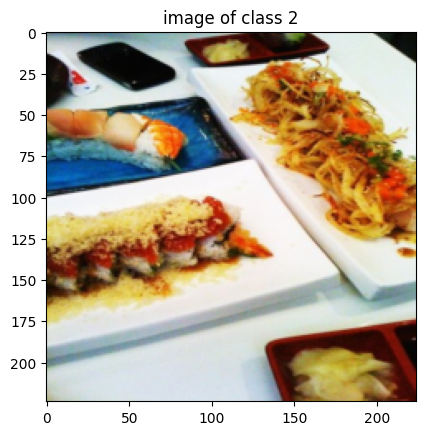

In [8]:

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 

imshow(image.permute(1, 2, 0).numpy())
plt.title(f'image of class {label}')
plt.show()


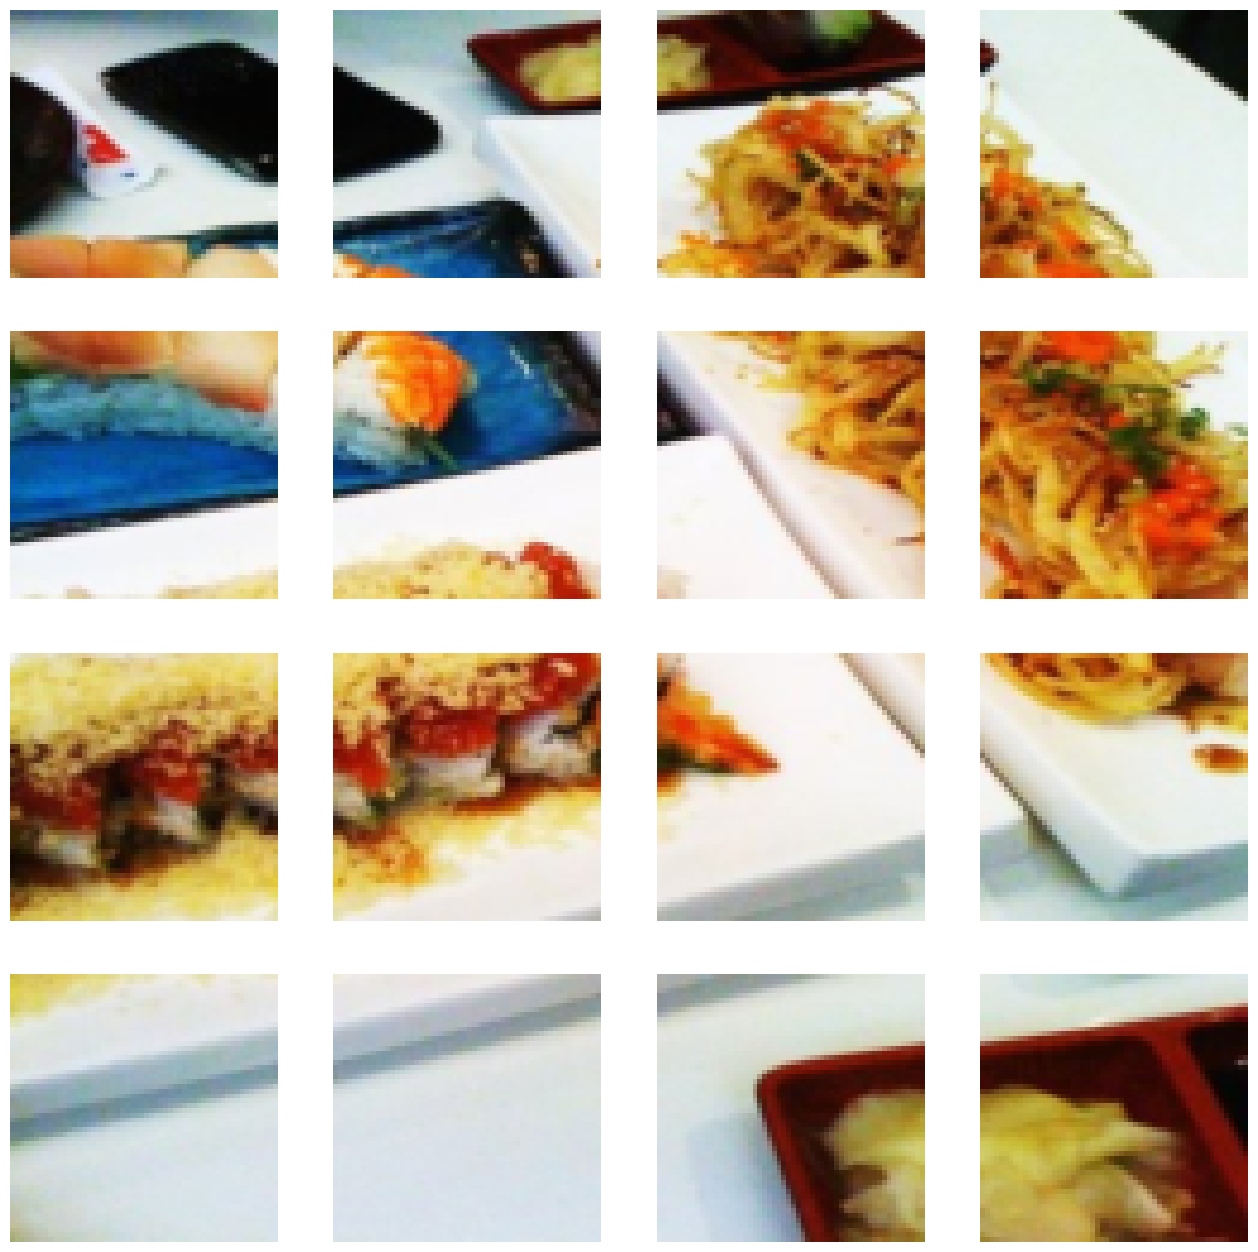

In [25]:
# let's try to better understand how the patching works

height, width, num_channels = IMAGE_SIZE, IMAGE_SIZE, 3
input_shape = (height, width, num_channels)

patch_size = 7 * 8
assert height % patch_size == width % patch_size == 0

# then we have
num_patches = int((height * width) / patch_size ** 2)

# let's visualize the process to get a better idea of what is happening

num_images_height = height // patch_size
num_images_width = width // patch_size

fig, ax = plt.subplots(nrows=num_images_height, ncols=num_images_width, sharey=True, sharex=True, figsize=(num_patches, num_patches))
image_numpy = image.permute(1, 2, 0).numpy()

for i in range(num_images_height):
    for j in range(num_images_width):
        ax[i, j].imshow(image_numpy[i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size, :]) 
        ax[i, j].axis("off")
        ax[i, j].set_xlabel(i * (num_images_width) + j)
        